<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# Exam Big Data [WS 2022/2023]: <font color="#C70039">Multi class classification of rice grains</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Term: Winter semester 2022/2023
* Students: 
    - Giacomo Fresi | 11141352
    - Maximilian Pekarski | 11120099
---------------------


### <font color="ce33ff">THE DATASET (Description of the problem and the dataset)</font>:

This dataset is a collection of 15000 pictures of 5 different types of rice: Arborio, Basmati, Ipsala, Jasmine and Karacadag. The pictures represent the different types of rice in their raw form. This dataset can be used to build a classification Convolutional Neural Network (CNN) that can accurately identify the type of rice in a given image, based on its visual characteristics. The main challenge with this dataset is likely to be the potential similarity in appearance between the different types of rice, which may make it difficult for the CNN to accurately classify them. Additionally, it's also important to make sure that the dataset is balanced and diverse enough for the model to generalize well.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">GENERAL APPROACH</font>:

When building a classification CNN for the given dataset, we would first need to ensure that the dataset is balanced and has equal representation of each type of rice. This means that the dataset should have the same number of images of each type, in this case, 15000 images per type. We would then need to preprocess the images to ensure that they are of the same size and format. We would also need to ensure that the images are of good quality, with clear depiction of the type of rice. Additionally, any necessary data augmentation techniques, such as scaling, rotation, and flipping, would be applied to increase the diversity of the data.

Once the dataset is prepared, we would need to divide the dataset into training, validation and test sets. This will help us to ensure that the model is not overfitting. we would also need to ensure that the training and validation sets have equal representation of each type of rice, so that the model is able to correctly learn the distinctions between the various types.

Next, an appropriate CNN architecture would be selected that can effectively learn the features of the different types of rice. We would need to choose appropriate hyperparameters such as learning rate, batch size and number of epochs, that are suitable for the task at hand. Additionally, we would need to ensure that the model is able to learn the features of the rice types, and is able to distinguish between them. This could be reinforced by using a pretrained model for feature extraction/ fine-tuning.

Finally, we would need to evaluate the model's performance by testing it on the test dataset. This will help us to assess how well the model is generalizing, and if it would able to accurately classify the various types of rice on unseen data. As the models perfomance metric we would use accuracy, since classes are evenly contained in the training and testing datasets.


## START OF THE NOTEBOOK CODE
---------------------------------------------------

## <font color="#C70039">Imports</font>

In [2]:
import tensorflow
tensorflow.keras.__version__
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True '
import shutil
import random
from tensorflow.keras.applications import VGG16
import pickle

In [ ]:
#import wandb
#from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

#wandb.login()

In [3]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = './data/original'

# The directory where to
# store the smaller dataset
base_dir = './data/sorted'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)


print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print('test_dir=',test_dir)

train_dir= ./data/sorted\train
validation_dir= ./data/sorted\validation
test_dir= ./data/sorted\test


The next Cell creates a function, that takes a folder containing all pictures and splits every classes into training, validation and test data, according to the value of the train_size, val_size and test_size variables.

In [17]:


train_size = 8000
val_size = 2000
test_size = 1000

# Create folder structure for train, validation and test data and distribute pictures accordingly

def split_pictures(train_size=train_size, val_size=val_size, test_size=test_size):
    train_start = random.randint(0,14999-train_size)
    val_start = random.choice(list(range(0, train_start-val_size)) + list(range(train_start+train_size, 14999)))
    test_start1 =  list(range(0, train_start-test_size)) + list(range(train_start+train_size, 14999))
    test_start2 = list(range(0, val_start+test_size)) + list(range(train_start+train_size, 14999))
    test_start = list(set(test_start1).intersection(test_start2))
    test_start = random.choice(test_start)


    # define paths of training and validation data

    train_arborio_dir = os.path.join(train_dir, 'arborio')
    train_basmati_dir = os.path.join(train_dir, 'basmati')
    train_ipsala_dir = os.path.join(train_dir, 'ipsala')
    train_jasmine_dir = os.path.join(train_dir, 'jasmine')
    train_karacadag_dir = os.path.join(train_dir, 'karacadag')

    validation_arborio_dir = os.path.join(validation_dir, 'arborio')
    validation_basmati_dir = os.path.join(validation_dir, 'basmati')
    validation_ipsala_dir = os.path.join(validation_dir, 'ipsala')
    validation_jasmine_dir = os.path.join(validation_dir, 'jasmine')
    validation_karacadag_dir = os.path.join(validation_dir, 'karacadag')

    test_arborio_dir = os.path.join(test_dir, 'arborio')
    test_basmati_dir = os.path.join(test_dir, 'basmati')
    test_ipsala_dir = os.path.join(test_dir, 'ipsala')
    test_jasmine_dir = os.path.join(test_dir, 'jasmine')
    test_karacadag_dir = os.path.join(test_dir, 'karacadag')


    # delete folders including sorted pictures if they exist, to ensure a new selection
    if os.path.exists(train_arborio_dir):
        shutil.rmtree(train_arborio_dir)
        shutil.rmtree(train_basmati_dir)
        shutil.rmtree(train_ipsala_dir)
        shutil.rmtree(train_jasmine_dir)
        shutil.rmtree(train_karacadag_dir)
        shutil.rmtree(validation_arborio_dir)
        shutil.rmtree(validation_basmati_dir)
        shutil.rmtree(validation_ipsala_dir)
        shutil.rmtree(validation_jasmine_dir)
        shutil.rmtree(validation_karacadag_dir)
        shutil.rmtree(test_arborio_dir)
        shutil.rmtree(test_basmati_dir)
        shutil.rmtree(test_ipsala_dir)
        shutil.rmtree(test_jasmine_dir)
        shutil.rmtree(test_karacadag_dir)



    # create training, validation and test folders

    # Directory with the training arborio pictures
    if not os.path.exists(train_arborio_dir):
        os.mkdir(train_arborio_dir)

    # Directory with the training basmati pictures
    if not os.path.exists(train_basmati_dir):
        os.mkdir(train_basmati_dir)

    # Directory with the training ipsala pictures
    if not os.path.exists(train_ipsala_dir):
        os.mkdir(train_ipsala_dir)

    # Directory with the training jasmine pictures
    if not os.path.exists(train_jasmine_dir):
        os.mkdir(train_jasmine_dir)

    # Directory with the training karacadag pictures
    if not os.path.exists(train_karacadag_dir):
        os.mkdir(train_karacadag_dir)



    # Directory with the validation arborio pictures
    if not os.path.exists(validation_arborio_dir):
        os.mkdir(validation_arborio_dir)

    # Directory with the validation basmati pictures
    if not os.path.exists(validation_basmati_dir):
        os.mkdir(validation_basmati_dir)

    # Directory with the validation ipsala pictures
    if not os.path.exists(validation_ipsala_dir):
        os.mkdir(validation_ipsala_dir)

    # Directory with the validation jasmine pictures
    if not os.path.exists(validation_jasmine_dir):
        os.mkdir(validation_jasmine_dir)

    # Directory with the validation karacadag pictures
    if not os.path.exists(validation_karacadag_dir):
        os.mkdir(validation_karacadag_dir)



    # Directory with the testing arborio pictures
    if not os.path.exists(test_arborio_dir):
        os.mkdir(test_arborio_dir)

    # Directory with the testing basmati pictures
    if not os.path.exists(test_basmati_dir):
        os.mkdir(test_basmati_dir)

    # Directory with the testing ipsala pictures
    if not os.path.exists(test_ipsala_dir):
        os.mkdir(test_ipsala_dir)

    # Directory with the testing jasmine pictures
    if not os.path.exists(test_jasmine_dir):
        os.mkdir(test_jasmine_dir)

    # Directory with the testing karacadag pictures
    if not os.path.exists(test_karacadag_dir):
        os.mkdir(test_karacadag_dir)



    # create new random subset of determined size

    # Copy first train_size arborio images to train_arborio_dir
    fnames = ['Arborio ({}).jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_arborio_dir, fname)
        shutil.copyfile(src, dst)

    # Copy NEXT val_size arborio images to validation_arborio_dir
    fnames = ['Arborio ({}).jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_arborio_dir, fname)
        shutil.copyfile(src, dst)

        # Copy first test_size arborio images to test_arborio_dir
    fnames = ['Arborio ({}).jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_arborio_dir, fname)
        shutil.copyfile(src, dst)
        

    # Copy first train_size basmati images to train_basmati_dir
    fnames = ['Basmati ({}).jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_basmati_dir, fname)
        shutil.copyfile(src, dst)

    # Copy NEXT val_size basmati images to validation_basmati_dir
    fnames = ['Basmati ({}).jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_basmati_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first test_size basmati images to test_basmati_dir
    fnames = ['Basmati ({}).jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_basmati_dir, fname)
        shutil.copyfile(src, dst)


    # Copy first train_size ipsala images to train_ipsala_dir
    fnames = ['Ipsala ({}).jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_ipsala_dir, fname)
        shutil.copyfile(src, dst)

    # Copy NEXT val_size ipsala images to validation_ipsala_dir
    fnames = ['Ipsala ({}).jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_ipsala_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first test_size ipsala images to test_ipsala_dir
    fnames = ['Ipsala ({}).jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_ipsala_dir, fname)
        shutil.copyfile(src, dst)



    # Copy first train_size jasmine images to train_jasmine_dir
    fnames = ['Jasmine ({}).jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_jasmine_dir, fname)
        shutil.copyfile(src, dst)

    # Copy NEXT val_size jasmine images to validation_jasmine_dir
    fnames = ['Jasmine ({}).jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_jasmine_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first test_size jasmine images to test_jasmine_dir
    fnames = ['Jasmine ({}).jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_jasmine_dir, fname)
        shutil.copyfile(src, dst)


    # Copy first train_size karacadag images to train_karacadag_dir
    fnames = ['Karacadag ({}).jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_karacadag_dir, fname)
        shutil.copyfile(src, dst)

    # Copy NEXT val_size karacadag images to validation_karacadag_dir
    fnames = ['Karacadag ({}).jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_karacadag_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first test_size karacadag images to test_karacadag_dir
    fnames = ['Karacadag ({}).jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_karacadag_dir, fname)
        shutil.copyfile(src, dst)
    
    return None

-----

## <font color="#C70039">Preprocessing</font>

### This preprocessing code is creating 2 generators, one for the training data and one for the validation data. The generators are applying data augmentation techniques to the training data, and only rescaling to the validation data, both are resizing the images and returning the images in batches of size 10 and one-hot encoded labels.

This preprocessing code uses the ImageDataGenerator class from the Keras library to create generators for the training and validation datasets. The batch_size variable is set to 10, which means that each batch of data passed through the generator will contain 10 images.

The train_datagen generator is used to preprocess the training data and it applies several data augmentation techniques such as rescaling, rotation, width and height shift, shear, zoom, and horizontal flip. These techniques are applied to increase the diversity of the data and help the model generalize better. The rescaling is done by dividing all pixel values by 255 to convert the pixel values to the range of [0,1].

The valid_datagen generator is used to preprocess the validation data. It only applies rescaling, dividing all pixel values by 255.

The flow_from_directory method is used to create the generator for the training and validation datasets, using the provided directories train_dir and validation_dir. The target_size parameter is set to (150, 150), which means that all images will be resized to 150x150 pixels. The batch_size parameter is set to the value of the batch_size variable, which is 10. The class_mode is set to 'categorical' which means that the generator will return one-hot encoded labels for the images.

In [8]:
batch_size=10

# returns training and validation generators

def generators(batch_size=batch_size):
    # All images will be [0,1] standardized
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

    valid_datagen = ImageDataGenerator(rescale=1.0/255)

    training_generator = train_datagen.flow_from_directory(
            # This is the target directory
            train_dir,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='categorical')

    validation_generator = valid_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='categorical')
            
    return training_generator, validation_generator

----------------
## <font color="#C70039">Choosing the model</font>

###  This code is using a pre-trained VGG16 CNN architecture as the base and adding additional layers to build the final model, The final model will have a flatten layer, a dense layer with 512 units and ReLU activation and a final dense layer with 5 units and a softmax activation function. The final model will be able to classify the images into 5 classes.

This code is using the VGG16 architecture, a pre-trained convolutional neural network (CNN) trained on the ImageNet dataset, as the base for the final model. The VGG16 function from the Keras library is used to instantiate the convolutional base. The weights parameter is set to 'imagenet', which means that the model will use pre-trained weights from the ImageNet dataset. The include_top parameter is set to False, which means that the fully connected layers at the top of the network, which are responsible for the final classification, will not be included. The input_shape parameter is set to (150, 150, 3), which means that the model will expect image inputs of size 150x150 pixels and 3 color channels (RGB).

The build_model function is then used to build the final model by adding additional layers on top of the VGG16 architecture. The Sequential class from the Keras models module is used to create an empty model, and the VGG16 architecture is added to this model using the add method.

The model is then built by adding a flatten layer, which flattens the output from the VGG16 to a 1D tensor, a dense layer with 512 units and a ReLU activation function, and a final dense layer with 5 units and a softmax activation function, since this is a multi-class, single-label classification problem. This final dense layer is responsible for the final classification, where the model will predict one of 5 classes.

In [9]:
#import VGG16 as base for fine-tuning
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


def build_model(conv_base=conv_base):
    
    model = models.Sequential()

    model.add(conv_base)

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    return model

----------------
## <font color="#C70039">Training the model</font>

### This code is used to train the model created previously, it's freezing the weights of the pre-trained VGG16 architecture and then compiling the model with a categorical cross-entropy loss function, RMSprop optimizer and accuracy as metrics. The model is then trained on the training generator for 30 epochs and the performance is evaluated on the validation generator after each epoch.

This code is used to train the model created by the previous steps. First, it sets the trainable attribute of the convolutional base to False, which means that the weights of the pre-trained VGG16 architecture will not be updated during training. Then, it creates the generators for the training and validation datasets using the generators() function. Next, the build_model() function is called to create the final model.

The model is then compiled using the compile() method, with the loss function set to 'categorical_crossentropy' which is a common loss function for multi-class classification problem, the optimizer set to RMSprop with learning rate of 2e-5 and the metrics set to 'acc' which stands for accuracy.

The fit() method is used to train the model on the training generator, with 30 epochs, the steps_per_epoch parameter is set to the train_size/batch_size which means that the model will go through the entire training dataset once in each epoch.

In [10]:
# set VGG16 Base to not trainable
conv_base.trainable = False

In [18]:
split_pictures()

In [19]:
training_generator, validation_generator = generators()

Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [20]:
model = build_model()

In [21]:
model.compile(loss='categorical_crossentropy', 
            optimizer=optimizers.RMSprop(learning_rate=2e-5), 
            metrics=['acc'])

In [22]:
history = model.fit(training_generator, 
                    steps_per_epoch=train_size/batch_size,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=val_size/batch_size)

Epoch 1/30
800/800 [==============================] - 233s 289ms/step - loss: 0.4857 - acc: 0.8683 - val_loss: 0.1219 - val_acc: 0.9695
Epoch 2/30
800/800 [==============================] - 232s 290ms/step - loss: 0.2039 - acc: 0.9362 - val_loss: 0.0748 - val_acc: 0.9795
Epoch 3/30
800/800 [==============================] - 236s 295ms/step - loss: 0.1627 - acc: 0.9454 - val_loss: 0.0867 - val_acc: 0.9755
Epoch 4/30
800/800 [==============================] - 234s 293ms/step - loss: 0.1448 - acc: 0.9507 - val_loss: 0.1221 - val_acc: 0.9590
Epoch 5/30
800/800 [==============================] - 236s 295ms/step - loss: 0.1264 - acc: 0.9559 - val_loss: 0.0820 - val_acc: 0.9695
Epoch 6/30
800/800 [==============================] - 234s 292ms/step - loss: 0.1249 - acc: 0.9559 - val_loss: 0.0718 - val_acc: 0.9725
Epoch 7/30
800/800 [==============================] - 238s 297ms/step - loss: 0.1112 - acc: 0.9634 - val_loss: 0.0721 - val_acc: 0.9755
Epoch 8/30
800/800 [============================

In [23]:
model.save('data/models/RiceClass_pretrained_CNN_FeatExtraction_using_data_augmentation.h5')

In [24]:
class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('./data/models'+
          '/RiceClass_pretrained_CNN_FeatExtraction_using_data_augmentation_History', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL) 

## <font color="#C70039">Fine-tuning</font>

The next few cells fine-tune the model, by unfreezing a few top layers of the VGG16-base and training the model again, so the unfrozen layers of VGG16 can adjust to fit our rice dataset a bit better.

In [26]:
# Unfreeze few top layers of VGG16

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [28]:
# fine-tune the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      training_generator,
      steps_per_epoch=train_size/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=val_size/batch_size)

Epoch 1/100
800/800 [==============================] - 270s 337ms/step - loss: 0.0550 - acc: 0.9654 - val_loss: 0.0224 - val_acc: 0.9875
Epoch 2/100
800/800 [==============================] - 268s 336ms/step - loss: 0.0335 - acc: 0.9768 - val_loss: 0.0246 - val_acc: 0.9835
Epoch 3/100
800/800 [==============================] - 265s 331ms/step - loss: 0.0282 - acc: 0.9814 - val_loss: 0.0294 - val_acc: 0.9810
Epoch 4/100
800/800 [==============================] - 272s 340ms/step - loss: 0.0238 - acc: 0.9831 - val_loss: 0.0297 - val_acc: 0.9790
Epoch 5/100
800/800 [==============================] - 271s 338ms/step - loss: 0.0216 - acc: 0.9852 - val_loss: 0.0312 - val_acc: 0.9825
Epoch 6/100
800/800 [==============================] - 271s 339ms/step - loss: 0.0182 - acc: 0.9876 - val_loss: 0.0281 - val_acc: 0.9810
Epoch 7/100
800/800 [==============================] - 267s 333ms/step - loss: 0.0189 - acc: 0.9872 - val_loss: 0.0231 - val_acc: 0.9845
Epoch 8/100
800/800 [====================

In [29]:
model.save('./data/models/RiceClass_pretrained_CNN_FeatExtraction_using_fine-tuning.h5')

In [30]:
with open('./data/models'+
          '/RiceClass_pretrained_CNN_FeatExtraction_using_fine-tuning_History', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL)    

----------------
## <font color="#C70039">Evaluating the model</font>

### This code is used to evaluate the model's performance on a test set after the training process is completed. It's plotting the training and validation accuracy and loss over the number of epochs and also smoothing the plots to identify any trends in the performance over time. Then it's creating a test generator and using the model's evaluate method to evaluate the performance on the test set, finally, it prints out the final test accuracy.

This code is used to evaluate the model's performance after training. It first extracts the training accuracy and validation accuracy, as well as the training loss and validation loss from the history object returned by the fit() method. These values are used to plot the training and validation accuracy and loss over the number of epochs.

The plots show the performance of the model on the training set and the validation set over the course of training. The smooth_curve function is used to smooth the plots, which can help to identify any trends in the performance over time.

Then, a test generator is created using the ImageDataGenerator class and the flow_from_directory method, using the test_dir directory and the same image preprocessing as the validation set. The evaluate() method is used to evaluate the performance of the model on the test set, using the test generator and the steps parameter set to test_size/batch_size which means that the model will evaluate the performance on the entire test dataset once. The final test accuracy is printed out.

In [43]:
model = tensorflow.keras.models.load_model('data/models/RiceClass_pretrained_CNN_FeatExtraction_using_fine-tuning.h5')

In [44]:
class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('./data/models/RiceClass_pretrained_CNN_FeatExtraction_using_fine-tuning_History', 'rb') as handle:
    model_history = pickle.load(handle)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 18,912,069
Trainable params: 11,276,805
Non-trainable params: 7,635,264
_________________________________________________________________


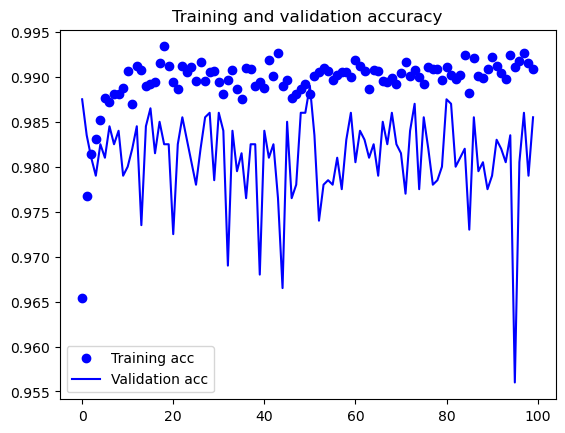

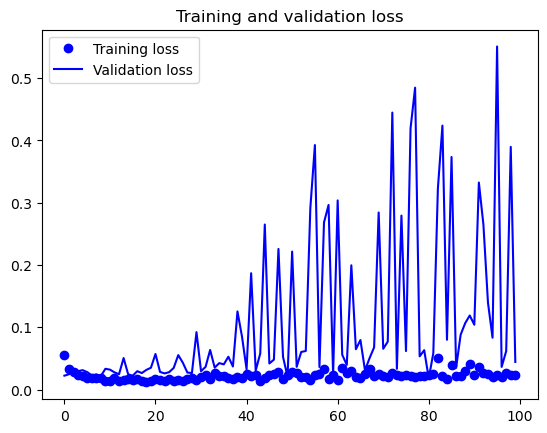

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

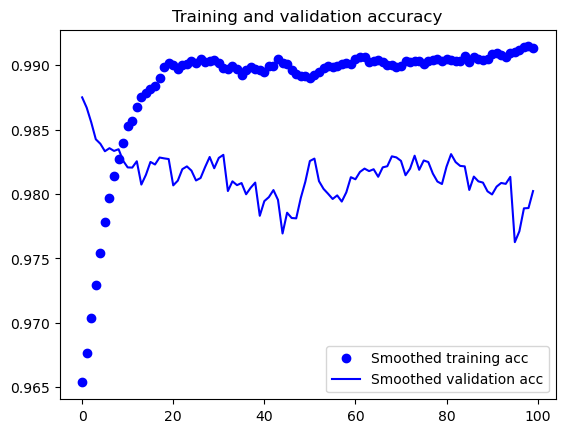

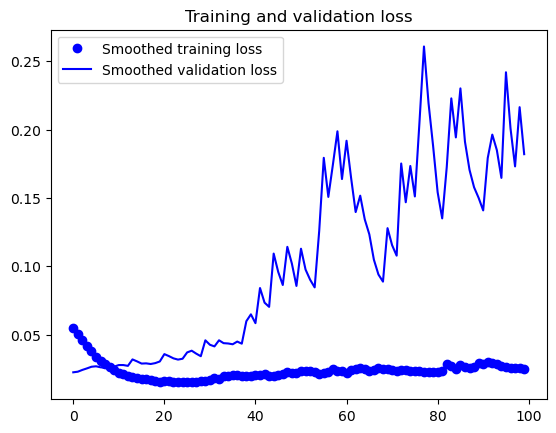

In [32]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_size/batch_size)
print('test acc after fine-tuning:', test_acc)

Found 2500 images belonging to 5 classes.
100/100 [==============================] - 23s 226ms/step - loss: 0.0109 - acc: 0.9930
test acc after fine-tuning: 0.9929999709129333


In [46]:
model = tensorflow.keras.models.load_model('data/models/RiceClass_pretrained_CNN_FeatExtraction_using_data_augmentation.h5')

In [47]:
class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('./data/models/RiceClass_pretrained_CNN_FeatExtraction_using_data_augmentation_History', 'rb') as handle:
    model_history = pickle.load(handle)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 18,912,069
Trainable params: 4,197,381
Non-trainable params: 14,714,688
_________________________________________________________________


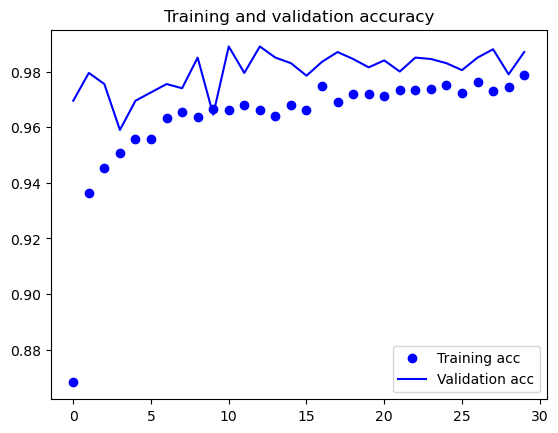

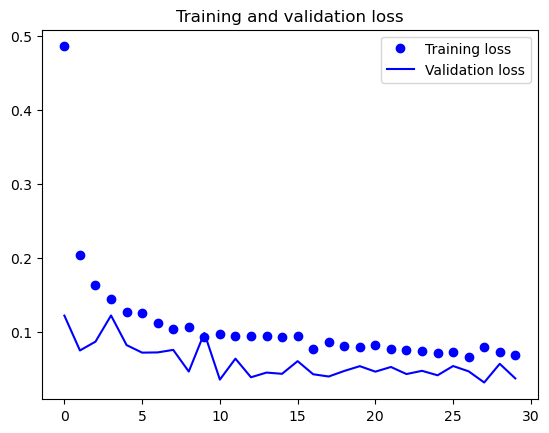

In [40]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

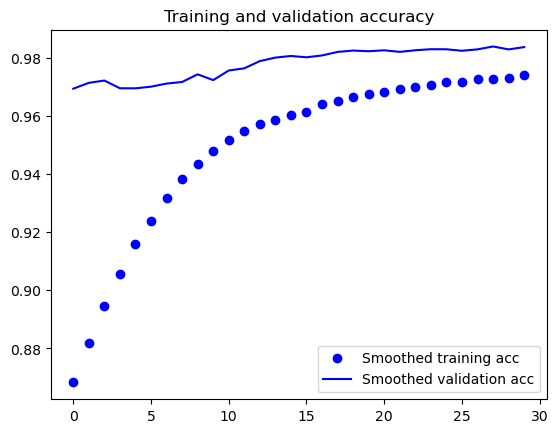

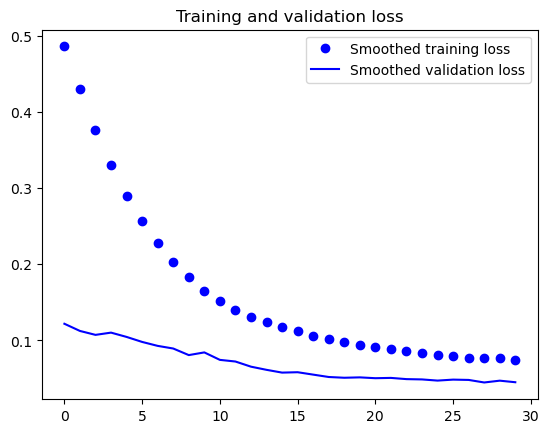

In [41]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_size/batch_size)
print('test acc after feature extraction:', test_acc)

Found 2500 images belonging to 5 classes.
100/100 [==============================] - 22s 220ms/step - loss: 0.0305 - acc: 0.9950
test acc after feature extraction: 0.9950000047683716


Both models are using the VGG16 architecture as the base, which is a popular architecture for image classification tasks. The dataset is well balanced with the same amount of data for each class and a similar distribution between the training, validation and test sets.

In terms of the number of parameters, both models have a total of 18,912,069 parameters, but the fine-tuning model has more trainable parameters (11,276,805) than the feature extraction model (4,197,381). This is because the fine-tuning model is unfreezing the last few layers of the VGG16 base and training them again, while the feature extraction model is freezing the VGG16 base and only training the added layers.

The fine-tuning process is done by unfreezing the last few layers of the VGG16 base, setting their trainable attribute to True and training them again with a lower learning rate. The model is then compiled with a binary cross-entropy loss function, RMSprop optimizer and accuracy as the metrics. The training process is done for 100 epochs on the training generator and the performance is evaluated on the validation generator after each epoch.

The only performance metric used to evaluate the model is accuracy, since the classes are balanced.

The fine-tuning model shows high fluctuations in training and validation accuracy and loss, while the feature extraction model shows low fluctuations. The validation accuracy and validation loss of the fine-tuning model becomes worse over the number of epochs, whereas the validation accuracy and validation loss of the feature extraction model gets continuously better over the number of epochs.

In addition, the validation accuracy and validation loss of the feature extraction model are constantly better than the training accuracy and training loss, while the validation accuracy and validation loss of the fine-tuning model are constantly worse than the training accuracy and training loss. The final test loss and final test accuracy of the feature extraction model are 0.03 and 0.995, respectively, while the final test loss and final test accuracy of the fine-tuning model are 0.012 and 0.9922, respectively.

The feature extraction model is faster to train and has lower fluctuations in training and validation accuracy and loss, and a better performance on the validation set as well as the test set. It's possible that the fine-tuning model's performance could be improved by optimizing the dropout rate, learning rate and other hyperparameters, as well as choosing different dense layers to add to the VGG16 architecture and selecting different layers to unfreeze during the fine-tuning process. However, since we have limited computational resources and time, and the fine-tuning took over 9 hours to run just one training iteration, it may not be worth it to invest more time and resources into fine-tuning for the small potential performance improvement.

----------------
## <font color="#C70039">Hyperparameter optimization</font>

### We opted not to use Hyperparameter Optimization due to its high computational cost, and because our test scores leaving little room for improvement.

Deciding against using hyperparameter optimization on the fine-tuning model is primarily motivated by the limited resources and little room for improvement in the results. Hyperparameter optimization is a process of fine-tuning the model's architecture, training and evaluation settings to improve the performance of the model. However, this process can be time-consuming and computationally expensive, as it often requires running multiple training iterations with different settings.

In this case, the fine-tuning model already took over 9 hours to run one training iteration, and thus, the computational resources required to run multiple iterations with different settings would be high. Additionally, the initial results of the fine-tuning model show that its performance on the validation set is worse than that of the feature extraction model, and thus, the potential for improvement from using hyperparameter optimization is limited.

Given the limited computational resources and the limited potential for improvement in the results, it makes more sense to focus on other aspects of the model development.

----------------
## <font color="#C70039">Result</font>


The results of the analysis show that two models were trained and evaluated, one using feature extraction and the other using fine-tuning. The VGG16 architecture was used as the base for both models, and the dataset consisted of pictures depicting five different types of rice: Arborio, Basmati, Ipsala, Jasmine and Karacadag. Each class had 15,000 pictures, with a similar distribution between the training, validation, and test sets.

The feature extraction model was trained for just under 2 hours, and it showed low fluctuations in training and validation accuracy and loss. The validation accuracy and validation loss of the feature extraction model were constantly better than the training accuracy and training loss. The final test loss and final test accuracy were 0.03 and 0.995, respectively.

On the other hand, the fine-tuning model took over 9 hours to train and showed high fluctuations in training and validation accuracy and loss. The validation accuracy and validation loss of the fine-tuning model were constantly worse than the training accuracy and training loss. The final test loss and final test accuracy were 0.012 and 0.9922, respectively.

In terms of the achieved results, we were able to train and evaluate two models using the VGG16 architecture and the dataset of pictures depicting different types of rice. The feature extraction model achieved a good performance on the validation set and a good performance on the test set.

The main disadvantage of the fine-tuning model is that it took much longer to train, compared to the feature extraction model, which could be a problem in real-world applications, where time is a critical factor. Additionally, the fine-tuning model has a lower performance on the validation and test sets and high fluctuations in the validation accuracy and loss.

----------------
## <font color="#C70039">Conclusion</font>

### short description

In this case, the feature extraction model is a better choice because of its faster training time, lower fluctuations in training and validation accuracy and loss, and better performance on the validation and test set. However, it's important to note that in some cases, fine-tuning the model can lead to significant improvements in performance, especially when the dataset is small, and one can leverage the knowledge learned by the pre-trained model. If the feature extraction model had not performed well, we would have tried fine-tuning, using smaller samples of the original data as an alternative approach. By using smaller samples, we could have reduced the training time of one run from 9 hours. However, the process would still have been computationally intensive. 
Another approach that could have been used is to optimize the hyperparameters of the models, such as the learning rate, batch size, dropout rate, etc. This could have improved the performance of the models and reduced the fluctuations in the training and validation accuracy and loss. Additionally, we could have used more advanced optimization techniques, such as Bayesian optimization, which is more efficient than grid search or random search.

Furthermore, we could have tried different architectures, such as ResNet, Inception, and MobileNet, which are known to be very efficient in image classification tasks, and compare their performance with the VGG16 architecture.

In summary, while the results of the model are good, there is always room for improvement and further experimentation.